### Ce notebook permet de faire de la reconaissnace de chiffre écrit à la main en utilisant un réseau de neurones convolutif. 


import : 

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

Chargement des données MNIST

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Normalisation des données pour faciliter l'apprentissage du réseau : 

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0

Création d'un modèle simple de réseau de neurones multicouches (4 couches)

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

C:\Users\pierr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilation du modèle

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Petit check du model

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Entraînement du modèle

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8534 - loss: 0.5086 - val_accuracy: 0.9682 - val_loss: 0.1204
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9533 - loss: 0.1587 - val_accuracy: 0.9747 - val_loss: 0.0868
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9673 - loss: 0.1067 - val_accuracy: 0.9787 - val_loss: 0.0774
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9716 - loss: 0.0898 - val_accuracy: 0.9780 - val_loss: 0.0739
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9761 - loss: 0.0771 - val_accuracy: 0.9793 - val_loss: 0.0702


Évaluation du modèle

In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9726 - loss: 0.0977
Test accuracy: 0.9761999845504761


Afficher les performances du modèle

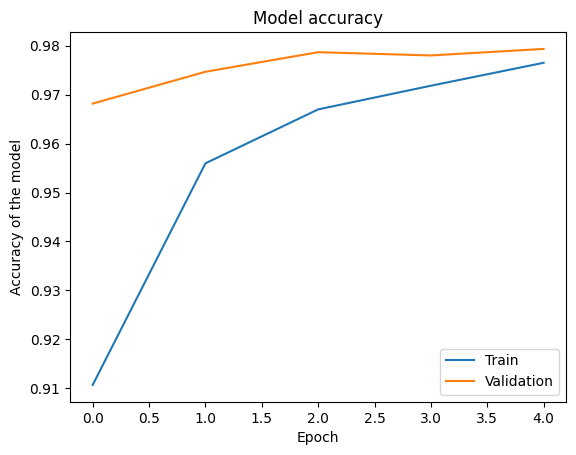

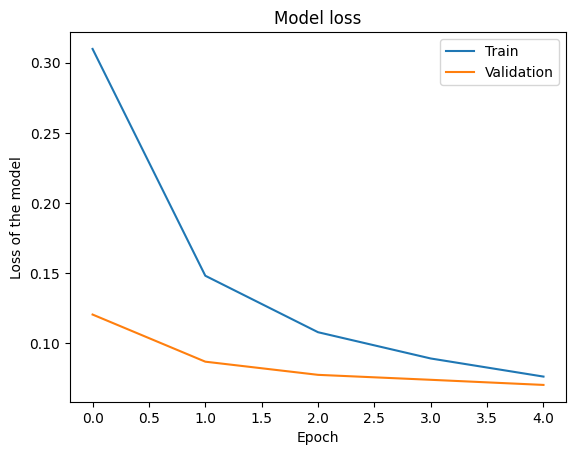

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss of the model')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Évaluer le modèle

In [10]:
scores = model.evaluate(x_test, y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 923us/step - accuracy: 0.9726 - loss: 0.0977
Accuracy: 97.62%


Prédiction et visualisation des résultats

In [11]:
predictions = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


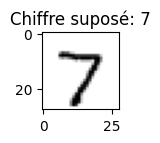

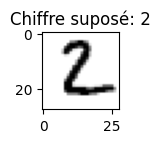

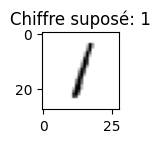

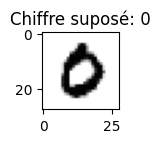

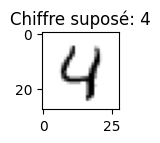

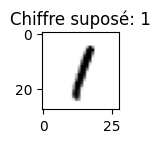

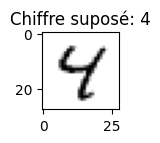

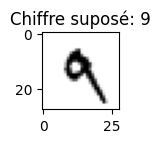

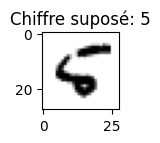

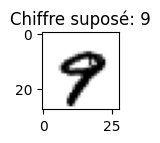

In [12]:
for i, prediction in enumerate(predictions):
    plt.figure(figsize=(1, 1))
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Chiffre suposé: {prediction.argmax()}")
    plt.show()

test du code avec des images faites à la main

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


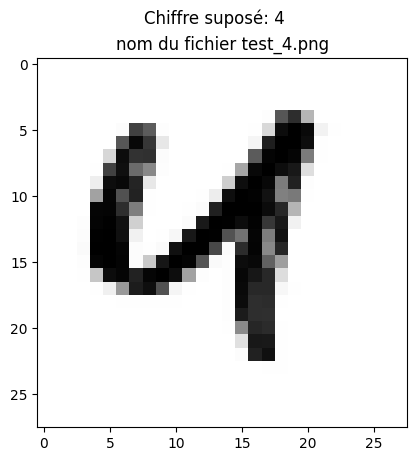

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


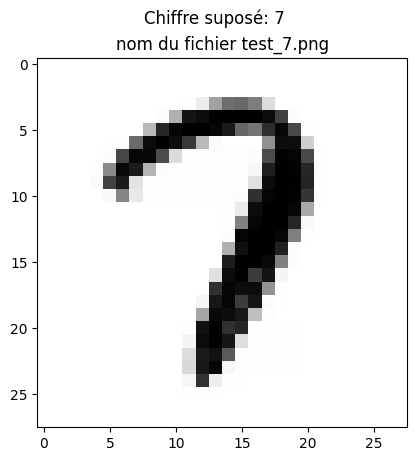

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


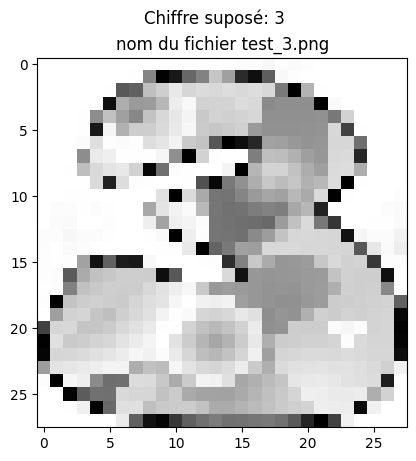

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


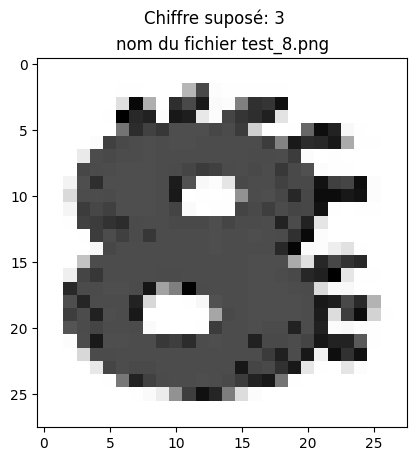

In [13]:
import cv2
import numpy as np

files_name = ['test_4.png', 'test_7.png', 'test_3.png','test_8.png']

for file_name in files_name:
    img = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (28, 28))
    img = np.invert(img)
    img = img / 255.0
    img = img.reshape(1, 28, 28)

    prediction = model.predict(img)
    plt.imshow(img.reshape(28, 28), cmap=plt.cm.binary)
    plt.suptitle(f"Chiffre suposé: {prediction.argmax()}")
    plt.title("nom du fichier " + file_name)
    plt.show()
